# Computación Científica - Tarea 5
---
Vicente Lizana Estivill  
vlizana@alumnos.inf.utfsm.cl  
201310004-K

---

## Introducción
---



En esta tarea utlizaremos interpolación de Lagrange en matrices para obtener una aproximación de como debería verse una imágen en un tiempo $t$ cualquiera a partir de otras imágenes captadas en tiempos fijos $t_0, t_1, t_2, ..., t_n$.

Exploraremos como varía el resultado al seleccionar diferentes sets de puntos para construir la interpolación y como ajustar resultados incompletos para que concuerden con lo necesitado.

---

## Desarrollo
---

### Bibliotecas, Definiciones y Funcionalidades
---

In [1]:
import matplotlib.pyplot as plt
from ipywidgets import widgets
from ipywidgets import IntSlider
import numpy as np
import pickle
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output
from ipywidgets import fixed
from IPython.display import display
from scipy.interpolate import interp1d
from scipy.optimize import newton
%matplotlib inline

In [2]:
def Chebyshev_points(xmin,xmax,n):
    ns = np.arange(1,n+1)[::-1]
    x = np.cos((2*ns-1)*np.pi/(2*n))
    return (xmin+xmax)/2 + (xmax-xmin)*x/2

In [3]:
images_list_faces = [0,4,8,12,16,20,24,28,32,36,40,44,48,52,56,60,64,68,72,76,80,84,88,92]
t_i_faces = np.array(images_list_faces).astype(float)
c_i_faces = Chebyshev_points(0,92,len(images_list_faces))

In [4]:
def show_images(x_t=0): 
    with open('images.pkl', 'rb') as handle:
        images = pickle.load(handle) ## Se abre el dataset de caras
    Original = images[x_t] #Aca se extrae la imagen original correspondiente a x_t del dataset de caras.
    I2 = interpolador(t_i_faces,images[images_list_faces],x_t) #Interpolación utilizando los x_t
    I3 = interpolador(c_i_faces,images[images_list_faces],x_t) #Interpolación utilizando los c_i
    I4 = interpoladorMejorado(t_i_faces,images[images_list_faces],x_t, c_i_faces) #Interpolación correción
    px,py = 180,139 #Dimension de las imagenes de caras.
    
    f, ax = plt.subplots(1,figsize = (12,3))
    ax.hlines(1,0,93)
    ax.set_xlim(-3,95)
    ax.set_ylim(-3,12)
    ax.plot(images_list_faces,np.ones(np.shape(images_list_faces)),'o',ms = 5, c= 'r',
            label = "puntos de interpolación")
    ax.plot(x_t,1,'o',ms = 5, c= 'b', label = "puntos de evaluación")
    for t in range(0,len(images_list_faces)):
       ax.text(images_list_faces[t],2, str(images_list_faces[t]), fontsize=10)
    ax.text(x_t,-1, str(x_t), fontsize=15)
    legend = ax.legend(loc='upper center', shadow=True, fontsize='large')
    ax.axis('off')
    
    f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharex='col', sharey='row', figsize=(16,4))
    
    ax1.imshow(np.reshape(Original,(px,py)), cmap='gray')
    ax2.imshow(np.reshape(I2,(px,py)), cmap='gray')
    ax3.imshow(np.reshape(I3,(px,py)), cmap='gray')
    ax4.imshow(np.reshape(I4,(px,py)), cmap='gray')
    ax1.set_title('Imagen Original en el instante t = '+ str(x_t))
    ax2.set_title('Interpolación Ptos Equiespaciados')
    ax3.set_title('Interpolación Chebyshev')
    ax4.set_title('Interpolación Chebyshev Mejorada')
    plt.show()

---

### Implementación de Interpoladores
---

In [5]:
def interpolador(ti,yi,t):
    lower_products = (np.tile(ti, (ti.shape[0], 1)).T - ti).T
    np.fill_diagonal(lower_products, 1)
    lower_products = np.multiply.reduce(lower_products)
    
    upper_products = (np.full((ti.shape[0], ti.shape[0]), t) - ti).T
    np.fill_diagonal(upper_products, 1)
    upper_products = np.multiply.reduce(upper_products)
    
    products = upper_products / lower_products
    valor = np.add.reduce((yi.T * products).T)
    return(valor)

In [6]:
def interpoladorMejorado(xi, yi, x, c_i_faces):
    t_from_s = lambda arg: x - interpolador(c_i_faces, xi, arg)
    zero = newton(t_from_s, x)
    valor = interpolador(c_i_faces, yi, zero)
    return(valor)

---

### Resultado
---

In [7]:
dx = 1
widgets.interact(show_images,x_t = (0,92,dx))

<function __main__.show_images>

---

### Gráficos para el análisis
---

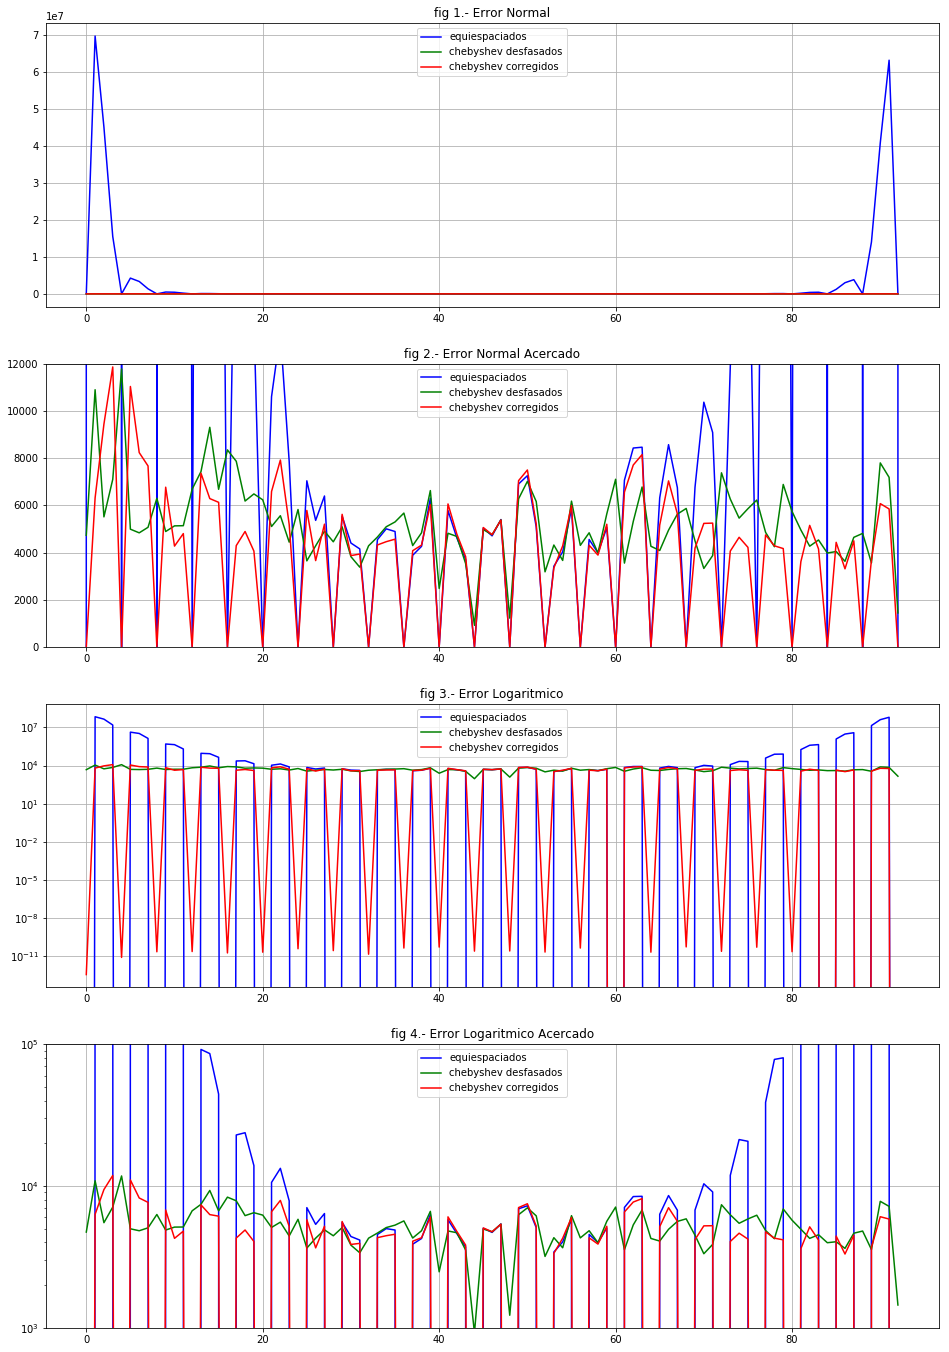

In [8]:
with open('images.pkl', 'rb') as _images:
    images = np.asarray(pickle.load(_images))

eqspc = np.zeros(images.shape)
cheb1 = np.zeros(images.shape)
cheb2 = np.zeros(images.shape)
for i in range(images.shape[0]):
    eqspc[i] = images[i] - interpolador(t_i_faces, images[images_list_faces], i)
    cheb1[i] = images[i] - interpolador(c_i_faces, images[images_list_faces], i)
    cheb2[i] = images[i] - interpoladorMejorado(t_i_faces, images[images_list_faces], i, c_i_faces)

eqspc_norm = np.linalg.norm(eqspc, axis=1)
cheb1_norm = np.linalg.norm(cheb1, axis=1)
cheb2_norm = np.linalg.norm(cheb2, axis=1)

times = np.arange(images.shape[0])

plt.figure(figsize=(16,24))
plt.subplot(411)
plt.plot(times, eqspc_norm, 'b', label='equiespaciados')
plt.plot(times, cheb1_norm, 'g', label='chebyshev desfasados')
plt.plot(times, cheb2_norm, 'r', label='chebyshev corregidos')
plt.title('fig 1.- Error Normal')
plt.legend()
plt.grid()

plt.subplot(412)
plt.plot(times, eqspc_norm, 'b', label='equiespaciados')
plt.plot(times, cheb1_norm, 'g', label='chebyshev desfasados')
plt.plot(times, cheb2_norm, 'r', label='chebyshev corregidos')
plt.ylim(0, 12000)
plt.title('fig 2.- Error Normal Acercado')
plt.legend()
plt.grid()

plt.subplot(413)
plt.plot(times, eqspc_norm, 'b', label='equiespaciados')
plt.plot(times, cheb1_norm, 'g', label='chebyshev desfasados')
plt.plot(times, cheb2_norm, 'r', label='chebyshev corregidos')
plt.yscale('log')
plt.title('fig 3.- Error Logaritmico')
plt.legend()
plt.grid()

plt.subplot(414)
plt.plot(times, eqspc_norm, 'b', label='equiespaciados')
plt.plot(times, cheb1_norm, 'g', label='chebyshev desfasados')
plt.plot(times, cheb2_norm, 'r', label='chebyshev corregidos')
plt.yscale('log')
plt.ylim(10**3, 10**5)
plt.title('fig 4.- Error Logaritmico Acercado')
plt.legend()
plt.grid()
plt.show()

---

## Análisis de Resultados
---

### Pregunta 1
---

* ¿Qué sucede cuando evaluamos en instantes de tiempos que no fueron utilizados para interpolar? ¿Qué pasa con los que sí fueron utilizados?
* ¿Hay indicios del fenómeno de Runge?, si es así, ¿Cómo lo identificó?

---

* En los puntos equiespaciados, podemos ver que representa la imágen perfectamente en los puntos de interpolación, lo que era esperable, mientras que en los puntos intermedios (o que no fueron utilizados para la interpolación) existe un error, el cual es bajo en el centro y extremadamente alto en los extremos. Esto se puede ver especialmente en la figura n° 3 del error logaritmico.
* Se puede ver que existe _Runge_ en lo saturadas que aparecen las imágenes interpoladas cerca de los extremos y también en los gráficos de análisis, sobretodo en la figura n° 1.

---

### Pregunta 2
---

* Utilizando los puntos de Chebyshev, ¿presentan las imágenes obtenidas de la interpolación el fenómeno de Runge?.
* Explique por qué hay un desfase al momento de evaluar en un instante de tiempo $t_{i}$ entre las imágenes que genera la interpolación hecha en  `I3` con la interpolación en `I2` y las imágenes originales.

---

* Se puede apreciar en los gráficos que estas interpolaciones no presentan fenómeno de Runge, ya que el error es acotado a lo largo de todo el intervalo.
* Este desfase se puede apreciar en los gráficos, especialmente figuras n° 2 y 4, ya que las imágenes interpoladas presentan error, lo que indica que la función interpoladora no pasa por los puntos de interpolación. Se produce ya que los puntos de Chebyshev se clusterizan a los extremos del intervalo, por lo que si queremos evaluar una imágen en un tiempo $t_k$ bajo, la representación quedará entre dos imágenes más altas. Lo mismo para un tiempo $t_k$ alto, mientras mas cerca de los extremos mayor es el desfase.

---

### Pregunta 3
---

* ¿Existe desfase? ¿Hay indicios de el fenómeno de Runge? Concluya.

---

* Podemos ver en las figuras n° 2 y 3 que no hay desfase, ya que el error se va a cero en los puntos de interpolación. Tampoco existe fenómeno de Runge ya que estamos utilizando Chebyshev, esto se puede ver en las figuras n° 2 y 4, en donde se aprecia un error muy similar al interpolador normal de chebyshev en los puntos que no se utilizaron para la interpolación. Se concluye que este interpolador recopila las ventajas de los anteriores sin tener sus desventajas.

---

## Conclusiones
---

En este trabajo logramos abstraer la interpolación unidimensional para poder generar un interpolador de imágenes, el cual probamos con diferentes puntos llegando a diferentes resultados incompletos. También pudimos acoplar los dos métodos para lograr un algoritmo de mejor comportamiento general.

Pudimos llegar a diferentes criterios de análisis para poder ver en mayor profundidad que era lo que estaba sucediendo dentro de la interpolación y poder identificar diferentes factores dañinos como el desfase y el fenómeno de Runge.

---

## Referencias
---

[Documentación de Numpy](http://www.numpy.org/)  
[Documentación de SciPy](https://www.scipy.org/)  
[Documentación de Matplotlib](http://matplotlib.org/)  
[Documentación de IpyWidgets](https://github.com/ipython/ipywidgets)